In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from celluloid import Camera

from samples.rl.bandit import (
    Bandit,
    BernoulliBandit,
    compare_agents,
)
from samples.rl.ucb import (
    UCB1Agent,
    UCB1Normal,
)


%matplotlib notebook
# %matplotlib inline

plt.style.use('ggplot')

<IPython.core.display.Javascript object>


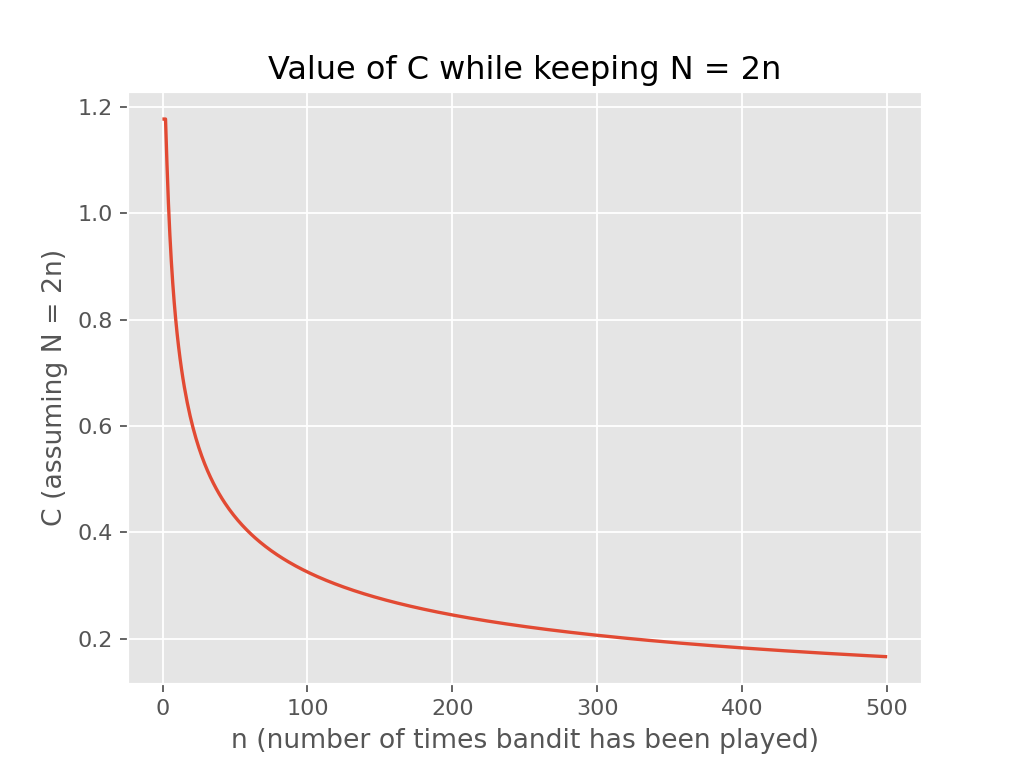

In [13]:
n = np.arange(1, 500)
N = 2 * n

plt.plot(n, np.sqrt(2 * np.log(N) / n))
plt.xlabel('n (number of times bandit has been played)')
plt.ylabel('C (assuming N = 2n)')
plt.title('Value of C while keeping N = 2n')
plt.show()

<IPython.core.display.Javascript object>


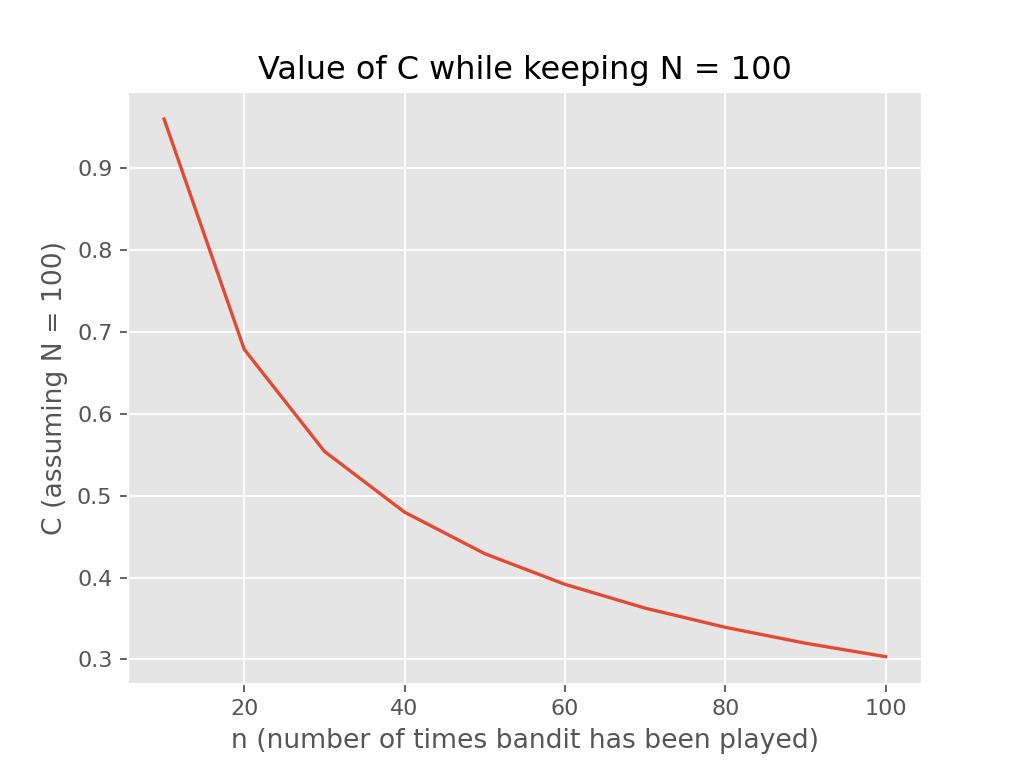

In [14]:
n = np.arange(0.1, 1.1, 0.1) * 100
N = [100] * len(n)

plt.plot(n, np.sqrt(2 * np.log(N) / n))
plt.xlabel('n (number of times bandit has been played)')
plt.ylabel('C (assuming N = 100)')
plt.title('Value of C while keeping N = 100')
plt.show()

In [4]:
bernoulli_probs = [0.2, 0.4, 0.6, 0.7, 0.8, 0.9]
bandits = [BernoulliBandit(p) for p in bernoulli_probs]

agent = UCB1Agent()
agent.bandits = bandits
agent.initialise()

In [5]:
agent.take_actions(20)
# for _ in range(total_actions):
#     agent.take_action()
uci = [agent.calculate_bandit_index(b) for b in bandits]
sns.barplot(y=[str(p) for p in bernoulli_probs], x=uci)
plt.xlabel('Upper Confidence Index')
plt.ylabel('Bandit')
#     sns.barplot(x=bernoulli_probs, y=[agent.rewards_log[b]['total_actions'] for b in bandits])
plt.show()

In [15]:
(
    [agent.rewards_log[b]['actions'] for b in bandits],
    [agent.rewards_log[b]['reward']  / agent.rewards_log[b]['actions'] for b in bandits], 
    [agent.calculate_bandit_index(b) for b in bandits]
)

([3, 4, 5, 7, 7, 10],
 [0.0, 0.25, 0.4, 0.7142857142857143, 0.7142857142857143, 0.9],
 [1.5456431106945117,
  1.5885661990458504,
  1.597250005380014,
  1.7261466503063727,
  1.7261466503063727,
  1.7465835975798387])

In [57]:
class GifGenerator:
    def __init__(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        self.ax3 = ax3
        
        self.bernoulli_probs = [0.6, 0.7, 0.8, 0.9]
        self.actions_per_iter = 5
        
    def prepare_for_run(self, iterations):
        self.agent = UCB1Agent()
        self.agent.bandits = [BernoulliBandit(p) for p in self.bernoulli_probs]
        self.agent.initialise()

    def update(self, current_iteration, total_iterations):  
        self.agent.take_actions(self.actions_per_iter)
        uci = [self.agent.calculate_bandit_index(b) for b in self.agent.bandits]
        
        # axis 1: upper confidence index
        self.ax1.text(
            0.5, 1, 'Iteration={}'.format((current_iteration + 1) * self.actions_per_iter),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=uci, ax=self.ax1)
        self.ax1.set(xlabel='Upper Confidence Index', ylabel='Bandits')
        
        # axis 2: bandit trials
        trials = [self.agent.rewards_log[b]['actions'] for b in self.agent.bandits]
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=trials, ax=self.ax2)
        self.ax2.set(
            xlabel='Bandit Trials', 
            ylabel='Bandits', 
            xlim=(0, total_iterations * self.actions_per_iter + 1)
        )
        
        # axis 3: sample mean estimate
        sample_mean = [
            self.agent.rewards_log[b]['reward'] / self.agent.rewards_log[b]['actions'] 
            for b in self.agent.bandits
        ]
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=sample_mean, ax=self.ax3)
        self.ax3.set(xlabel='Sample Mean', ylabel='Bandits')
        
        
        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

<IPython.core.display.Javascript object>


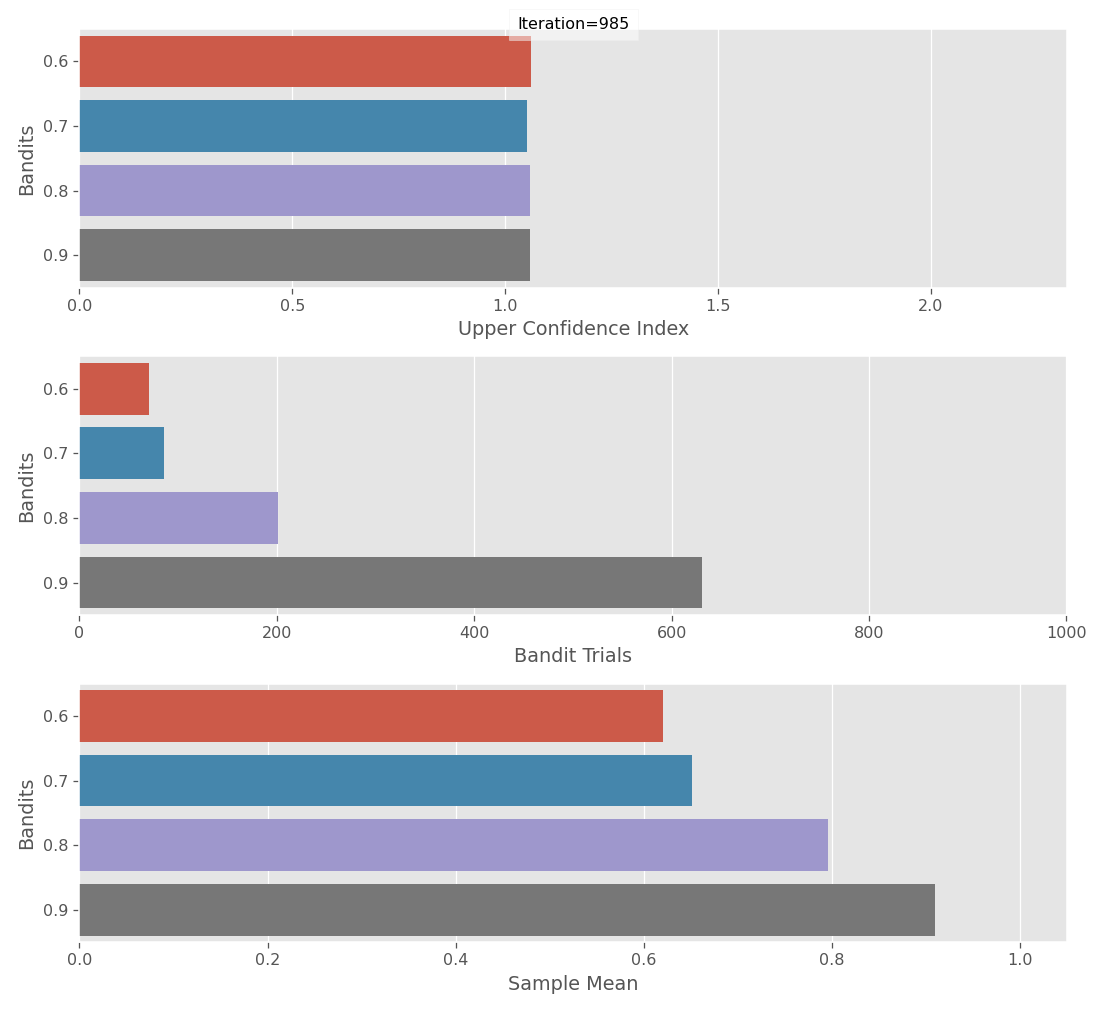

MovieWriter imagemagick unavailable; using Pillow instead.


In [60]:
gg = GifGenerator()
animation = gg.create_animation(200, interval=400)
animation.save('ucb1.gif', writer='imagemagick')

In [6]:
class GifGenerator2:
    def __init__(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        self.ax3 = ax3
        
        self.means = [2, 5, 7, 9, 11]
        self.actions_per_iter = 2
        
    def prepare_for_run(self, iterations):
        self.agent = UCB1Normal()
        self.agent.bandits = [Bandit(mu, sigma=2.5, lower_bound=0) for mu in self.means]
        self.agent.initialise()

    def update(self, current_iteration, total_iterations):  
        self.agent.take_actions(self.actions_per_iter)
        uci = [self.agent.calculate_bandit_index(b) for b in self.agent.bandits]
        
        # axis 1: upper confidence index
        self.ax1.text(
            0.5, 1, 'Iteration={}'.format((current_iteration + 1) * self.actions_per_iter),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        sns.barplot(y=[str(p) for p in self.means], x=uci, ax=self.ax1)
        self.ax1.set(xlabel='Upper Confidence Index', ylabel='Bandits')
        
        # axis 2: bandit trials
        trials = [self.agent.rewards_log[b]['actions'] for b in self.agent.bandits]
        sns.barplot(y=[str(p) for p in self.means], x=trials, ax=self.ax2)
        self.ax2.set(
            xlabel='Bandit Trials', 
            ylabel='Bandits', 
            xlim=(0, total_iterations * self.actions_per_iter + 1)
        )
        
        # axis 3: sample mean estimate
        sample_mean = [
            self.agent.rewards_log[b]['reward'] / self.agent.rewards_log[b]['actions'] 
            for b in self.agent.bandits
        ]
        sns.barplot(y=[str(p) for p in self.means], x=sample_mean, ax=self.ax3)
        self.ax3.set(xlabel='Sample Mean', ylabel='Bandits')
        
        
        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

<IPython.core.display.Javascript object>


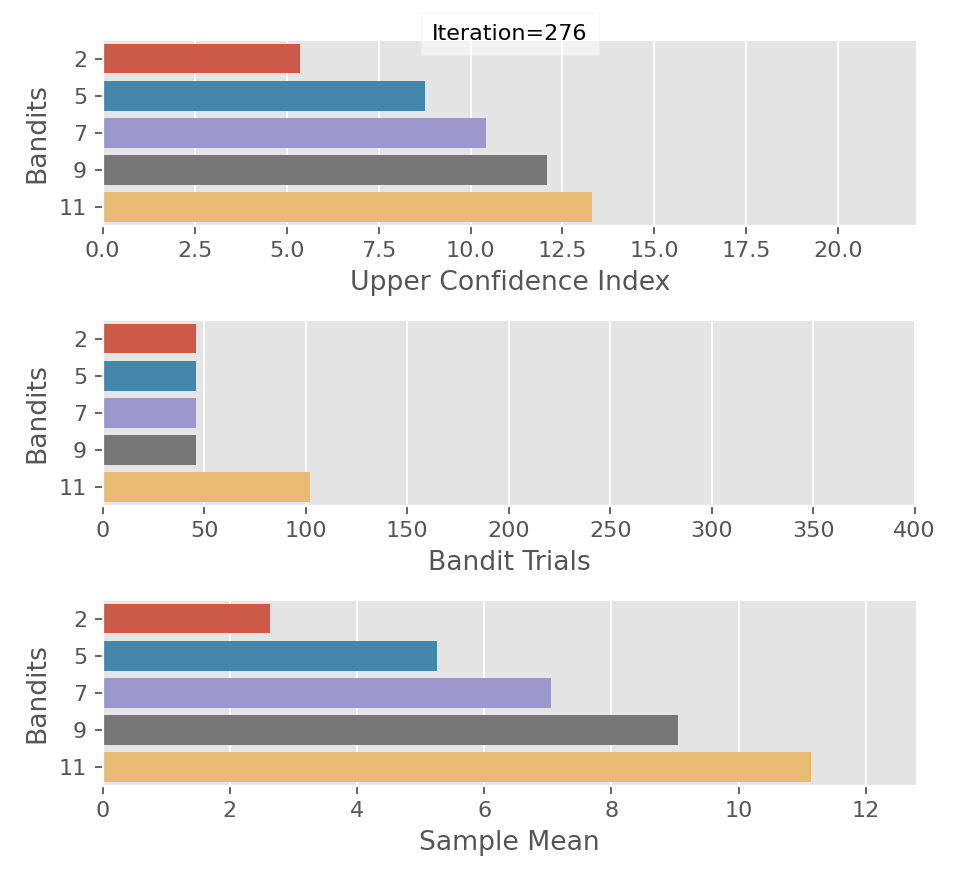

MovieWriter imagemagick unavailable; using Pillow instead.


In [15]:
gg = GifGenerator2()
animation = gg.create_animation(200, interval=400)
animation.save('ucb1_normal_sigma25.gif', writer='imagemagick')

<IPython.core.display.Javascript object>


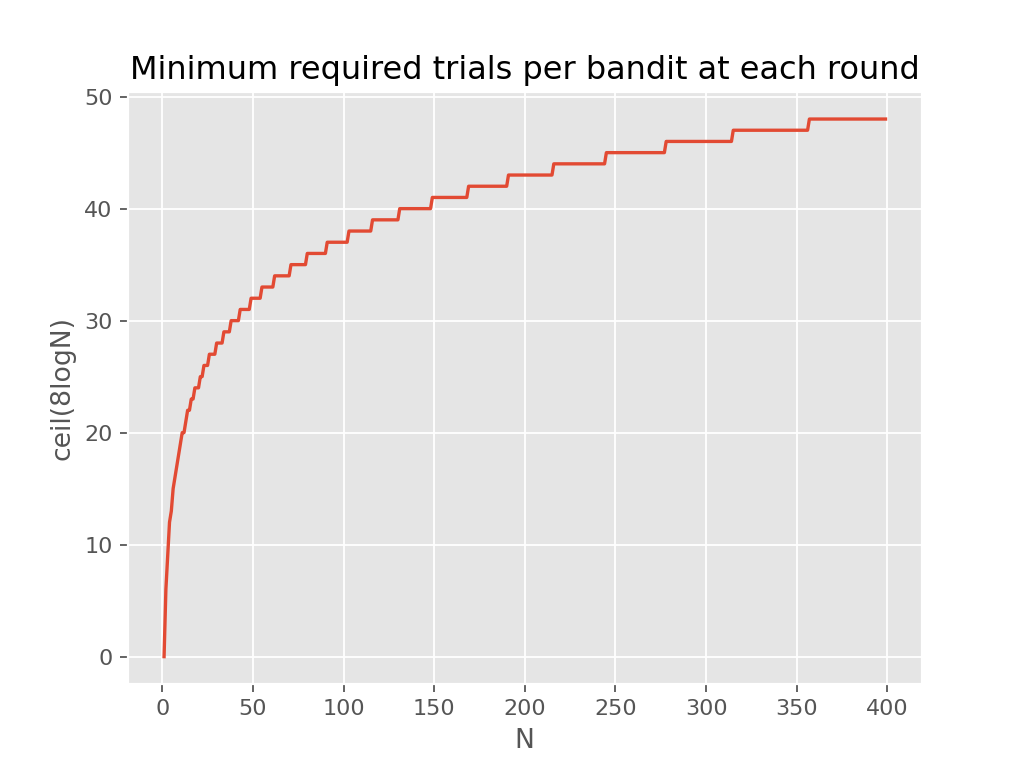

In [12]:
plt.plot(np.arange(1, 400), np.ceil(8 * np.log(np.arange(1, 400))))
plt.xlabel('N')
plt.ylabel('ceil(8logN)')
plt.title('Minimum required trials per bandit at each round')
plt.show()